In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd

mon_features = pd.read_csv('/content/drive/MyDrive/Machine_Learning/mon_features_modified.csv')
mon_labels = pd.read_csv('/content/drive/MyDrive/Machine_Learning/mon_labels.csv')

unmon_features = pd.read_csv('/content/drive/MyDrive/Machine_Learning/unmon_features_modified.csv')
unmon_labels = pd.read_csv('/content/drive/MyDrive/Machine_Learning/unmon_labels.csv')


In [17]:
features = pd.concat([mon_features, unmon_features], axis=0, ignore_index=True)
labels = pd.concat([mon_labels, unmon_labels], axis=0, ignore_index=True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def scaler_samples(train_X,test_X):
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

X, y = features, labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [19]:
from sklearn.model_selection import train_test_split

X, y = features, labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

scaler_samples(X_train,X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=1000,
    criterion='entropy',
    max_depth=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_leaf_nodes = 2000,
    bootstrap=True,
    class_weight='balanced',
    n_jobs=-1
)

clf.fit(X_train, y_train)

<ipython-input-20-5508a59c65dc>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, max_leaf_nodes=2000, n_estimators=1000,
                       n_jobs=-1)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Accuracy: 0.5293103448275862
Confusion Matrix
 [[76 14 51 ... 49  7 15]
 [ 0 26  0 ...  1  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 43  0]
 [ 0  2  0 ...  0  0 28]]


In [22]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [23]:
# Calculating Precision and Recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [24]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.6978715635469283
Recall: 0.5293103448275862


In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.04      0.08      1932
           0       0.52      0.59      0.55        44
           1       0.35      0.69      0.46        45
           2       0.51      0.86      0.64        43
           3       0.40      0.89      0.55        36
           4       0.64      0.84      0.72        50
           5       0.77      0.79      0.78        38
           6       0.66      0.88      0.75        52
           7       0.49      0.85      0.62        41
           8       0.62      0.85      0.72        41
           9       0.62      0.84      0.71        50
          10       0.58      0.78      0.67        41
          11       0.43      0.66      0.52        35
          12       0.68      1.00      0.81        47
          13       0.33      0.31      0.32        36
          14       0.46      0.68      0.55        47
          15       0.42      0.80      0.55        44
   

Text(0, 0.5, 'Precision')

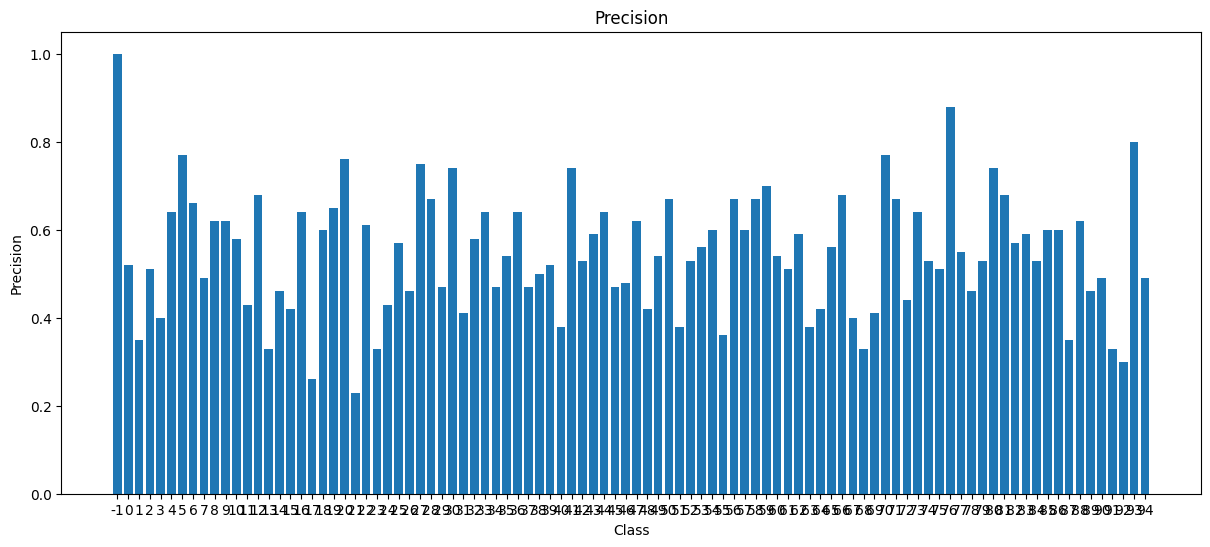

In [26]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd


data = []
lines = class_report.split('\n')
for line in lines[2:-5]:
    row = line.strip().split()
    class_name = row[0]
    precision = float(row[1])
    recall = float(row[2])
    f1_score = float(row[3])
    data.append([class_name, precision, recall, f1_score])


df = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-score'])

plt.figure(figsize=(50, 6))

# Precision
plt.subplot(1, 3, 1)
plt.bar(df['Class'], df['Precision'])
plt.title('Precision')
plt.xlabel('Class')
plt.ylabel('Precision')


Text(0, 0.5, 'Recall')

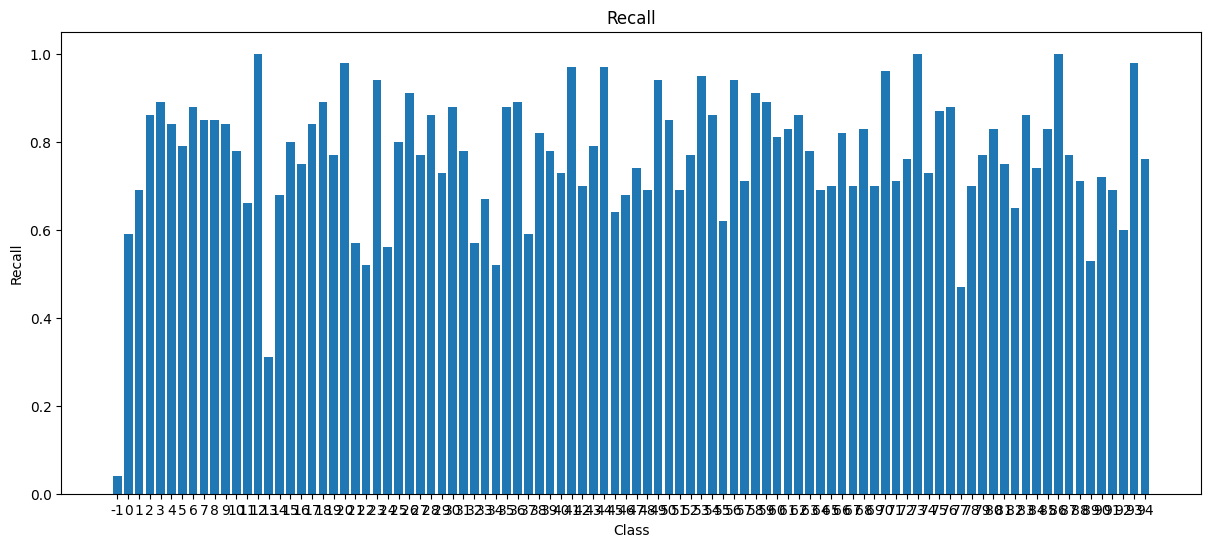

In [27]:
plt.figure(figsize=(50, 6))

# Recall
plt.subplot(1, 3, 2)
plt.bar(df['Class'], df['Recall'])
plt.title('Recall')
plt.xlabel('Class')
plt.ylabel('Recall')

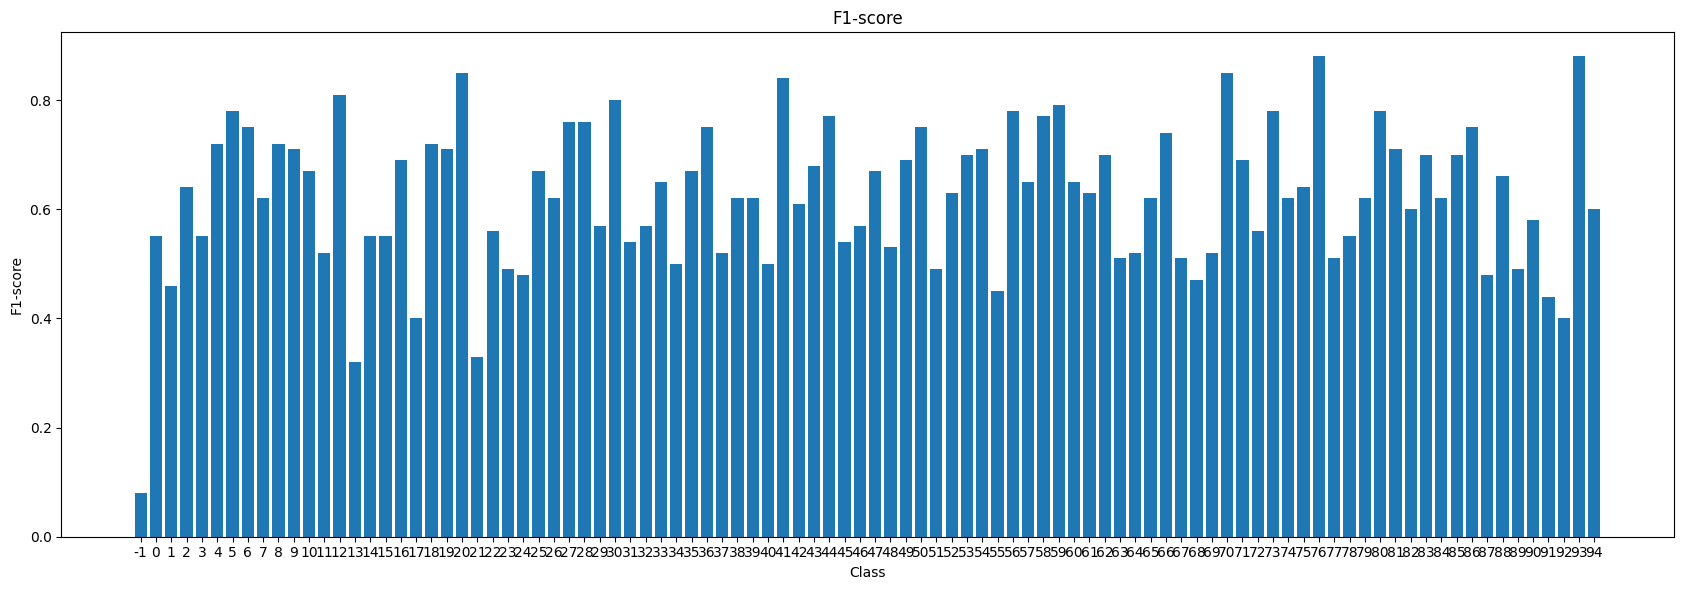

In [28]:
plt.figure(figsize=(50, 6))

# F1-score
plt.subplot(1, 3, 3)
plt.bar(df['Class'], df['F1-score'])
plt.title('F1-score')
plt.xlabel('Class')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()